In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv("heights.txt", sep = " ")
df.head()

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0


In [3]:
df.shape

(1375, 2)

In [4]:
df.describe()

,Mheight,Dheight
count,1375.000000,1375.000000
mean,62.452800,63.751055
std,2.355103,2.600053
min,55.400000,55.100000
25%,60.800000,62.000000
50%,62.400000,63.600000
75%,63.900000,65.600000
max,70.800000,73.100000


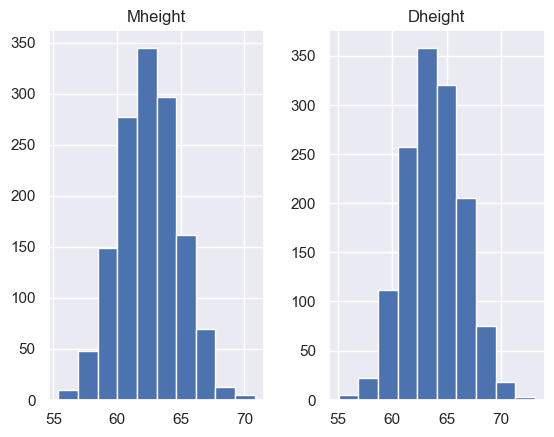

In [5]:
# Since these are two quantative vairable, we can see the histograms
df.hist()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


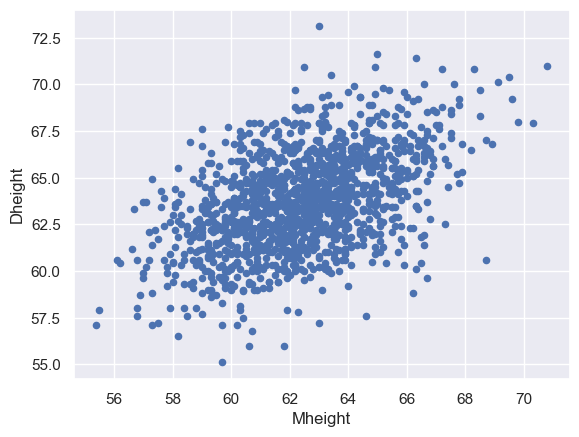

In [6]:
# plot the scatter plot
df.plot.scatter(x="Mheight", y="Dheight")
plt.show()

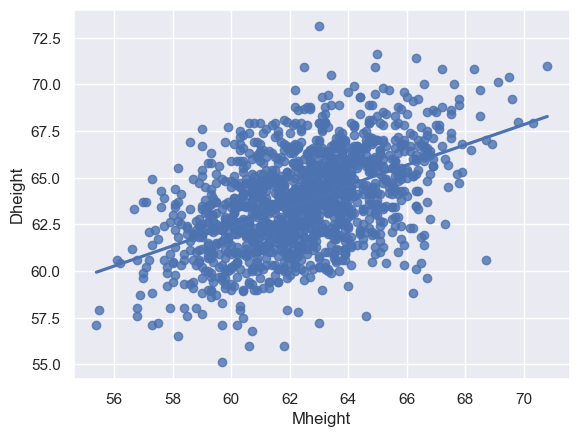

In [7]:
# plot with regression line
sns.regplot(x = 'Mheight', y = 'Dheight', data = df, ci =False)
plt.show()

In [8]:
# covariance
df[['Mheight','Dheight']].cov()

,Mheight,Dheight
Mheight,5.546511,3.004806
Dheight,3.004806,6.760274


In [9]:
cov = df[['Mheight','Dheight']].cov().iloc[0,1]
cov

3.0048059970887917

In [10]:
# Correlation
df.corr()

,Mheight,Dheight
Mheight,1.000000,0.490709
Dheight,0.490709,1.000000


In [11]:
rxy = df.corr().iloc[0,1]
rxy

0.4907093614575403

In [12]:
df.mean()

Mheight    62.452800
Dheight    63.751055
dtype: float64

In [13]:
mean_x = df.mean().loc['Mheight']
print("Explanatory Variable Mean:", mean_x)

mean_y = df.mean().loc['Dheight']
print("Response Variable Mean:", mean_y)

Explanatory Variable Mean: 62.4528
Response Variable Mean: 63.75105454545455


In [14]:
df.std()

Mheight    2.355103
Dheight    2.600053
dtype: float64

In [15]:
std_x = df.std().loc['Mheight']
print("Explanatory Variable std:", std_x)

std_y = df.std().loc['Dheight']
print("Explanatory Variable std:", std_y)

Explanatory Variable std: 2.3551032760896145
Explanatory Variable std: 2.600052621081698


In [16]:
slope = rxy * std_y / std_x
slope

0.5417470114369861

In [17]:
intercept = mean_y - mean_x * slope
intercept

29.917436789582744

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
results = smf.ols("Dheight ~ Mheight", data = df).fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.22e-84
Time:                        18:10:06   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593


In [29]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [31]:
results.rsquared

0.24079567742206187

In [32]:
df.head()

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0


In [37]:
results.fittedvalues

0       62.259733
1       61.447113
2       62.747306
3       62.801480
4       63.397402
          ...    
1370    67.352155
1371    65.130993
1372    65.835264
1373    68.273125
1374    64.047499
Length: 1375, dtype: float64

In [38]:
results.resid

0      -7.159733
1      -4.947113
2      -6.747306
3      -6.001480
4      -7.397402
          ...   
1370    2.747845
1371    6.469007
1372    5.564736
1373    2.726875
1374    9.052501
Length: 1375, dtype: float64

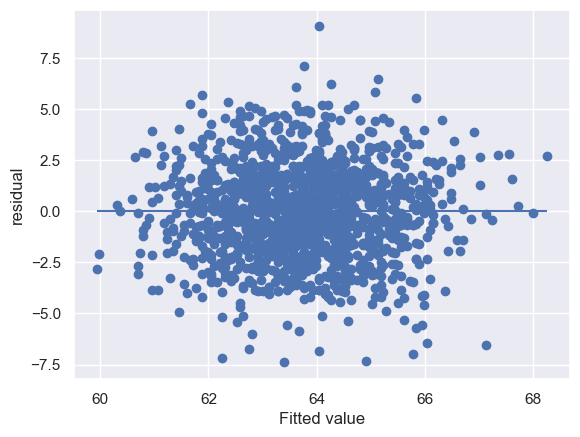

In [42]:
plt.scatter(x = results.fittedvalues, y =results.resid)
plt.hlines(y = 0, xmin = np.min(results.fittedvalues), xmax = np.max(results.fittedvalues))
plt.xlabel('Fitted value')
plt.ylabel('residual')
plt.show()

In [43]:
# confidence interval
from scipy.stats import t

In [47]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593


In [50]:
point_estimate = 0.5417
n = 1375
multiplier = t.ppf(0.975, df = n - 2)
se = 0.026

In [52]:
lower = point_estimate - multiplier * se
upper = point_estimate + multiplier * se
print(lower, upper)

0.4906959746132617 0.5927040253867382


In [53]:
results.params

Intercept    29.917437
Mheight       0.541747
dtype: float64